### Radial Equilibrium

To validate the axisymmetric solver we need to check the validity of the radial equilibrium equation for swirling flow

$$ 
\frac{dp}{dr} = \rho \frac{\rho u_{\theta}^2}{r}
$$

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
from Utils.styles import *
import os 

In [31]:
intputFile = 'volumeData/results_96_32.csv'
os.makedirs('radialEquilibrium', exist_ok=True)

# Read the first three lines to extract grid sizes
with open(intputFile, 'r') as f:
    ni = int(f.readline().strip().split('=')[1])
    nj = int(f.readline().strip().split('=')[1])
    nk = int(f.readline().strip().split('=')[1])

# Read the rest of the CSV data into a DataFrame
df = pd.read_csv(intputFile, skiprows=3)
data = {}

for field in df.columns:
    data[field] = np.reshape(df[field].values, (ni, nj, nk))

# extract the data at middle axial location
radius = data['y'][ni//2, :, 0]
utheta = data['Velocity Z'][ni//2, :, 0]
ux = data['Velocity X'][ni//2, :, 0]
density = data['Density'][ni//2, :, 0]
pressure = data['Pressure'][ni//2, :, 0]

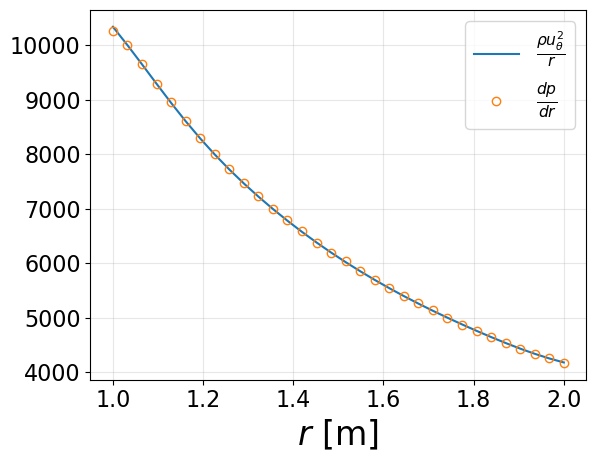

In [22]:
dpdr = np.gradient(pressure, radius, edge_order=2)
rhs = density * (utheta**2 / radius)

plt.plot(radius, rhs, label=r'$\frac{\rho u_{\theta}^2}{r}$')
plt.plot(radius, dpdr, 'o', mfc='none', label=r'$\frac{dp}{dr}$')
plt.xlabel(r'$r$ [m]')
plt.legend()
plt.grid(alpha=0.3)
plt.savefig('radialEquilibrium/radial_equilibrium.pdf', bbox_inches='tight')

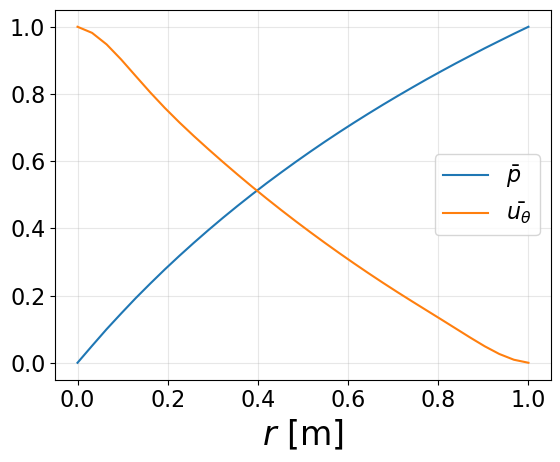

In [33]:
idx = ni//2

def rescale(f):
    return (f-f.min())/(f.max()-f.min())

plt.plot(rescale(radius), rescale(pressure), label=r'$\bar{p}$')
plt.plot(rescale(radius), rescale(utheta), label=r'$\bar{u_{\theta}}$')

plt.xlabel(r'$r$ [m]')
plt.legend()
plt.grid(alpha=0.3)
plt.savefig('radialEquilibrium/radial_equilibrium.pdf', bbox_inches='tight')